In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

In [2]:
data = pd.read_csv('./dataset.csv')
print(data.shape)
data.head(3)

(6787, 15)


,order_id,customer_id,sector_id,planned_delivery_duration,order_id-2,product_id,quantity,product_id-2,weight,segment_id,driver_id,segment_type,order_id-3,segment_start_time,segment_end_time
0,1312,149,1,175,1312,30,1,30,818,0,4,STOP,1312,2024-02-09 14:58:42,2024-02-09 15:01:56
1,1273,228,3,177,1273,87,1,87,982,2,4,STOP,1273,2024-02-24 09:26:31,2024-02-24 09:32:12
2,1273,228,3,177,1273,95,3,95,1491,2,4,STOP,1273,2024-02-24 09:26:31,2024-02-24 09:32:12


In [3]:
#addding new column with calculated actual time of delivery
data['segment_end_time'] = pd.to_datetime(data['segment_end_time'])
data['segment_start_time'] = pd.to_datetime(data['segment_start_time'])
data['actual_time'] = (data['segment_end_time'] - data['segment_start_time']).astype(int) / 1000000000
data.head(3)

,order_id,customer_id,sector_id,planned_delivery_duration,order_id-2,product_id,quantity,product_id-2,weight,segment_id,driver_id,segment_type,order_id-3,segment_start_time,segment_end_time,actual_time
0,1312,149,1,175,1312,30,1,30,818,0,4,STOP,1312,2024-02-09 14:58:42,2024-02-09 15:01:56,194.0
1,1273,228,3,177,1273,87,1,87,982,2,4,STOP,1273,2024-02-24 09:26:31,2024-02-24 09:32:12,341.0
2,1273,228,3,177,1273,95,3,95,1491,2,4,STOP,1273,2024-02-24 09:26:31,2024-02-24 09:32:12,341.0


In [4]:
data[['planned_delivery_duration', 'quantity', 'weight', 'actual_time']].describe()

,planned_delivery_duration,quantity,weight,actual_time
count,6787.000000,6787.000000,6787.000000,6787.000000
mean,176.848239,2.013408,1081.893620,328.496095
std,4.949192,0.820438,564.305022,1429.507885
min,169.000000,1.000000,140.000000,-303.000000
25%,175.000000,1.000000,610.000000,92.000000
50%,176.000000,2.000000,1066.000000,168.000000
75%,177.000000,3.000000,1533.000000,266.000000
max,200.000000,3.000000,1997.000000,14943.000000


In [5]:
# There are 35 records with negative time, these are cleary incorrect values because time can't be negative so they are removed from the dataset. 
# I will leave the records with the 0 time, because I don't have enough data to determine if they are invalid. 
# For example there could me multiple orders for a bigger place like żabka, where delivery guy has to leave multiple packages for different customers and with different order id

print(len(data[data['actual_time'] < 0]))
data = data[data['actual_time'] >= 0]
data

35


,order_id,customer_id,sector_id,planned_delivery_duration,order_id-2,product_id,quantity,product_id-2,weight,segment_id,driver_id,segment_type,order_id-3,segment_start_time,segment_end_time,actual_time
0,1312,149,1,175,1312,30,1,30,818,0,4,STOP,1312,2024-02-09 14:58:42,2024-02-09 15:01:56,194.0
1,1273,228,3,177,1273,87,1,87,982,2,4,STOP,1273,2024-02-24 09:26:31,2024-02-24 09:32:12,341.0
2,1273,228,3,177,1273,95,3,95,1491,2,4,STOP,1273,2024-02-24 09:26:31,2024-02-24 09:32:12,341.0
3,1273,228,3,177,1273,56,1,56,318,2,4,STOP,1273,2024-02-24 09:26:31,2024-02-24 09:32:12,341.0
4,1273,228,3,177,1273,12,2,12,1447,2,4,STOP,1273,2024-02-24 09:26:31,2024-02-24 09:32:12,341.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6782,2053,129,3,180,2053,55,3,55,1734,4988,2,STOP,2053,2024-02-07 20:23:11,2024-02-07 20:25:10,119.0
6783,2053,129,3,180,2053,85,1,85,1493,4988,2,STOP,2053,2024-02-07 20:23:11,2024-02-07 20:25:10,119.0
6784,2053,129,3,180,2053,47,1,47,310,4988,2,STOP,2053,2024-02-07 20:23:11,2024-02-07 20:25:10,119.0
6785,2053,129,3,180,2053,11,1,11,338,4988,2,STOP,2053,2024-02-07 20:23:11,2024-02-07 20:25:10,119.0


In [6]:
data[['planned_delivery_duration', 'quantity', 'weight', 'actual_time']].describe()

,planned_delivery_duration,quantity,weight,actual_time
count,6752.000000,6752.000000,6752.000000,6752.000000
mean,176.846564,2.013626,1082.157287,331.187056
std,4.959905,0.820846,564.081857,1432.707505
min,169.000000,1.000000,140.000000,0.000000
25%,175.000000,1.000000,610.000000,94.000000
50%,176.000000,2.000000,1066.000000,170.000000
75%,177.000000,3.000000,1533.000000,267.000000
max,200.000000,3.000000,1997.000000,14943.000000


In [7]:
print('Number of records, in which delivery was on time:', len(data[data['actual_time'] <= data['planned_delivery_duration']]))
print('Number of records, in which actual time exceeds MAXIMUM planned time:', len(data[data['actual_time'] > 200]))
print('Number of records with delivery time over an hour:', len(data[data['actual_time'] > 3600]))

Number of records, in which delivery was on time: 3540
Number of records, in which actual time exceeds MAXIMUM planned time: 2747
Number of records with delivery time over an hour: 67


Out of 6752 records, 3540 came on time. The highest planned delivery duration is 200 seconds, however, in reality, 40% of deliveries exceed this time. This indicates a significant discrepancy between planned and actual delivery durations. Because planned delivery is a mean of all of the records, it is not personalized to the individual record.

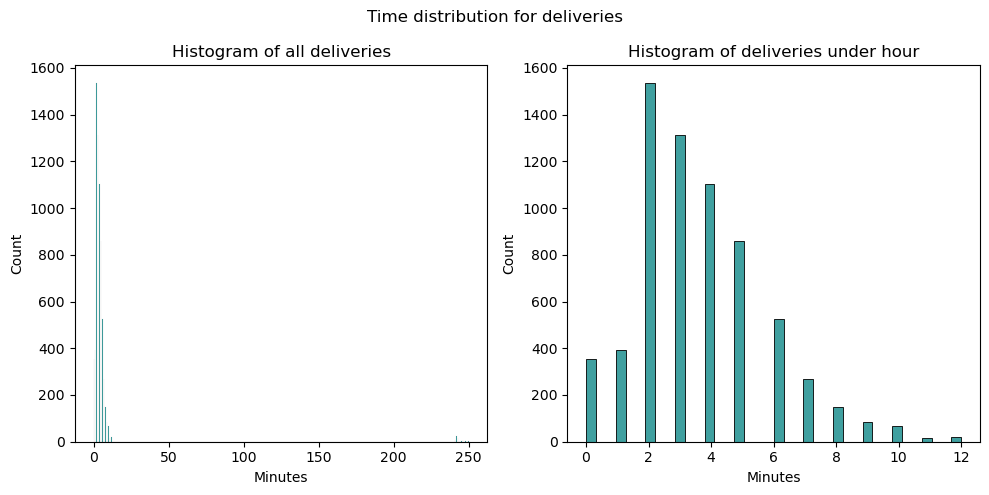

In [8]:
data['actual_time_minutes'] = np.ceil(data['actual_time'] / 60)
fig,axes = plt.subplots(1,2, figsize = (10,5))
sns.histplot(data['actual_time_minutes'], ax=axes[0], color= 'teal')
axes[0].set_xlabel('Minutes')
axes[0].set_title('Histogram of all deliveries')

sns.histplot(data[data['actual_time_minutes'] <= 40]['actual_time_minutes'], ax=axes[1], color= 'teal')
axes[1].set_xlabel('Minutes')
axes[1].set_title('Histogram of deliveries under hour')

plt.suptitle('Time distribution for deliveries')
plt.tight_layout()

From the plot we can observe that there is a significant gap between 15 and 240 minutes, this may for example indicate a scenario where delivery drivers recorded all of their deliveries as being completed at the end of their shift, possibly during a break, without accurately logging the exact delivery times. After considering only the first part we can see a Histogram with a distribution resembling Gaussian but with majority of the deliveries clustered near the lower range. Given the presence of these high times, I suspect that these records may not represent actual delivery behavior but rather could be errors or anomalies in the data. I will exclude these outlier values from further analysis to ensure more reliable insights. I was already suspicious of the records in the earlier part (describe table) but this visualization has solidified my understanding.

In [9]:
data = data[data['actual_time_minutes'] < 15]

/var/folders/6v/vn2k148n6p559d0ql_7qrfc40000gn/T/ipykernel_44306/1638079132.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data.loc[: ,'prediction_error'] = data['actual_time'] - data['planned_delivery_duration']


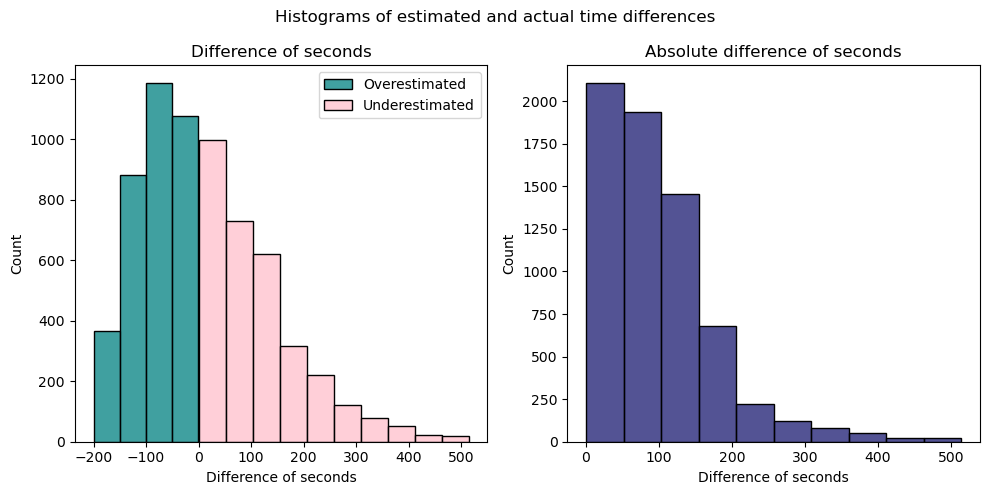

In [10]:
data.loc[: ,'prediction_error'] = data['actual_time'] - data['planned_delivery_duration']
fig,axes = plt.subplots(1,2, figsize=(10,5))

sns.histplot(data[data['prediction_error'] < 0]['prediction_error'], binwidth=50, color='teal', ax=axes[0], label='Overestimated')
sns.histplot(data[data['prediction_error'] >= 0]['prediction_error'], binwidth=50, color='pink', ax=axes[0], label='Underestimated')
axes[0].set_xlabel('Difference of seconds')
axes[0].legend()
axes[0].set_title('Difference of seconds')


sns.histplot(abs(data['prediction_error']), binwidth= 50, color = 'midnightblue', ax=axes[1])
axes[1].set_xlabel('Difference of seconds')
axes[1].set_title('Absolute difference of seconds')

plt.suptitle('Histograms of estimated and actual time differences')
plt.tight_layout()

In the first plot we can see that the data is clearly split into two categories based on whether the actual delivery time was overestimated (actual time is shorter than planned) or underestimated (actual time is longer than planned), overestimated category has less bins, with maximum difference of 200, while underestimated has a wider range to over 500. The second plot, which shows the absolute differences, helps to clarify the overall trend, the majority clusters around 0, with higher counts up to 200 second time difference. As the differences increase, the number of deliveries decreases.

Ammount of records from this sector = 2201
Mean time for 1 sector = 244.62380736029078
Mean predicition error for 1 sector = 67.44843253066787

Ammount of records from this sector = 2142
Mean time for 2 sector = 160.2110177404295
Mean predicition error for 2 sector = -16.38468720821662

Ammount of records from this sector = 2342
Mean time for 3 sector = 161.07087959009394
Mean predicition error for 3 sector = -15.736549957301452



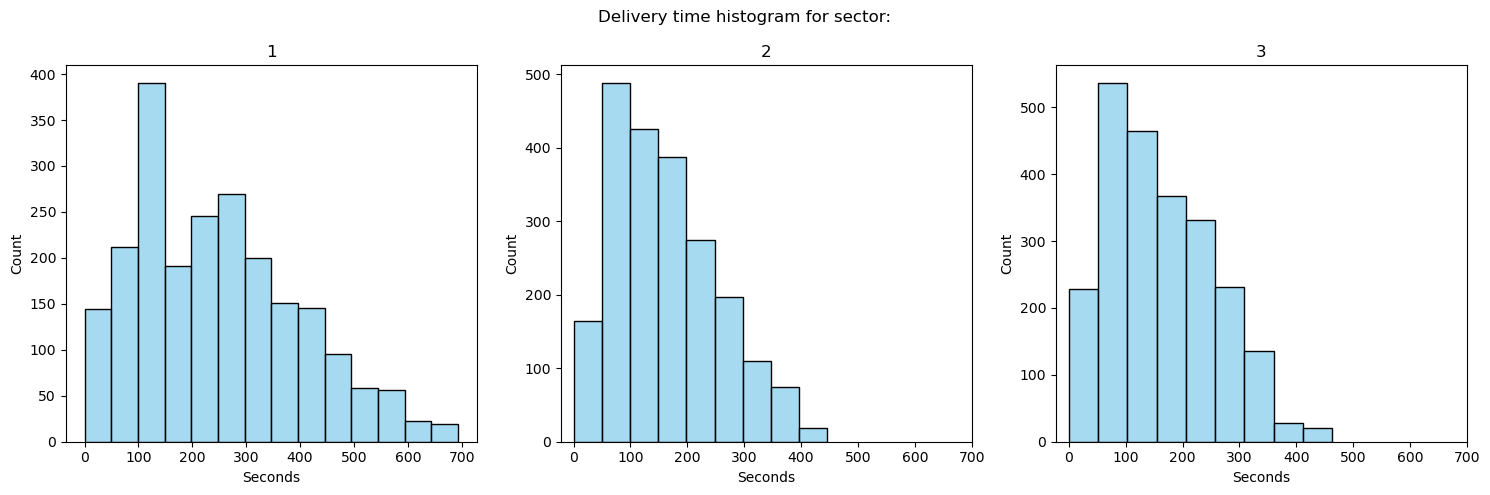

In [11]:
fig, axes = plt.subplots(1,3,figsize=(15,5))

for i, sector in enumerate(sorted(data['sector_id'].unique())):
    sns.histplot(data[data['sector_id'] == sector]['actual_time'], ax=axes[i], binwidth=50, color='skyblue')
    axes[i].set_xticks(range(0, 701, 100))
    print(f'Ammount of records from this sector = {len(data[data['sector_id'] == sector])}')
    print(f'Mean time for {sector} sector = {data[data['sector_id'] == sector]['actual_time'].mean()}')
    print(f'Mean predicition error for {sector} sector = {data[data['sector_id'] == sector]['prediction_error'].mean()}\n')
    axes[i].set_title(sector)
    axes[i].set_xlabel('Seconds')

plt.suptitle('Delivery time histogram for sector:')
plt.tight_layout()

As we can see from the plots, the delivery time range for the first sector is noticeably wider—by almost 300 seconds—compared to the others. Additionally, it has an average delivery time that is approximately 85 seconds longer. <br>
Another interesting observation is that the first sector is the only one where the mean prediction error is positive. Moreover, this error exceeds one minute, which indicates that the planned delivery time is significantly underestimated. This misestimation may be skewing the overall performance results and suggests that the prediction model should be adjusted for this specific sector.

<Axes: >

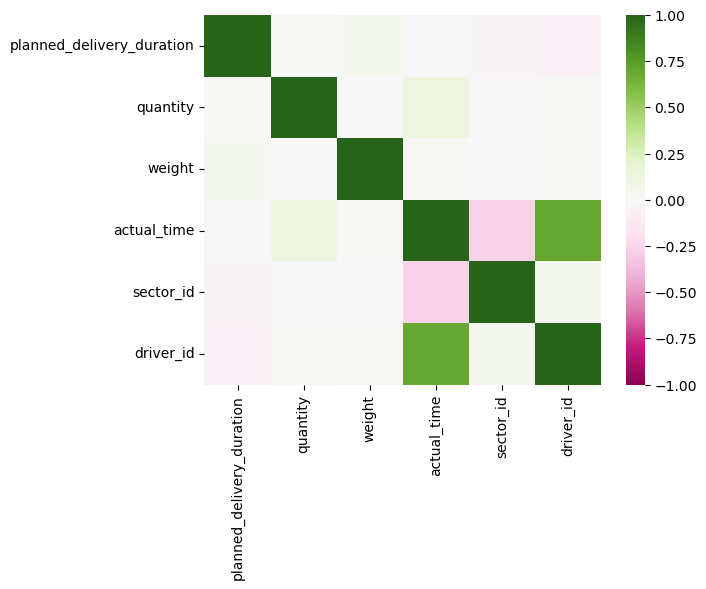

In [12]:
exploration_data = data[['planned_delivery_duration', 'quantity', 'weight', 'actual_time', 'sector_id', 'driver_id']]
sns.heatmap(exploration_data.corr(), cmap='PiYG', vmin = -1, vmax = 1)

The only meaningful correlations are between actual time and sectors/drivers, I will explore the corelation with drivers.

In [13]:
driver_data = exploration_data.groupby('driver_id').mean()[['planned_delivery_duration', 'actual_time']]
driver_data

,planned_delivery_duration,actual_time
driver_id,,
1,177.046180,75.935576
2,177.388996,151.961612
3,176.397668,220.027988
4,176.644888,308.990926


In [14]:
data[data['actual_time'] == 0].groupby('driver_id').size()

driver_id
1    106
2     91
3     85
4     74
dtype: int64

In [15]:
exploration_data[exploration_data['actual_time'] != 0].groupby('driver_id').mean()[['planned_delivery_duration', 'actual_time']]

,planned_delivery_duration,actual_time
driver_id,,
1,176.956311,80.819782
2,177.427310,161.355978
3,176.436196,231.501840
4,176.574414,323.471818


In [16]:
driver_sector = exploration_data.groupby(['driver_id', 'sector_id']).size().unstack(fill_value=0)
driver_sector

sector_id,1,2,3
driver_id,,,
1,620,488,646
2,574,513,476
3,507,572,636
4,500,569,584


There is a visible difference of delivery time depenging on driver, even though the driver with id 1 was in the hardest sector with id 1 as much as others, he was still the fastest one.

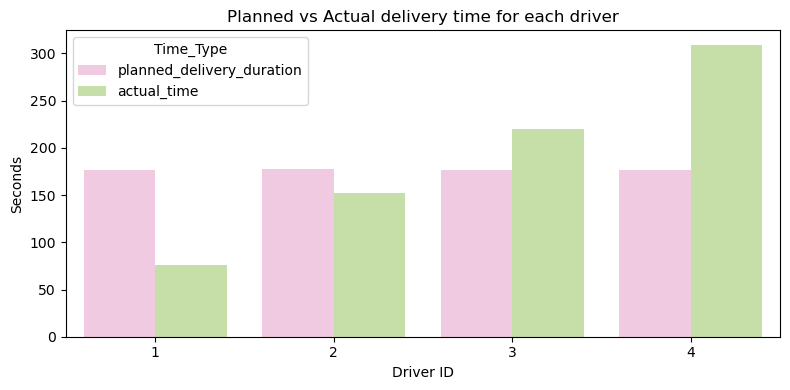

In [17]:
data_reset = driver_data.reset_index().melt(id_vars='driver_id', value_vars=['planned_delivery_duration', 'actual_time'], var_name='Time_Type', value_name='Time')

plt.figure(figsize=(8, 4))
sns.barplot(x='driver_id', y='Time', hue='Time_Type', data=data_reset, palette="PiYG")

plt.title('Planned vs Actual delivery time for each driver')
plt.xlabel('Driver ID')
plt.ylabel('Seconds')
plt.tight_layout()